In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [79]:
pacientes = pd.read_csv('dataFinal.csv', sep=';', header=None)
pacientes = pacientes[1:]
pacientesOriginales =  pd.read_csv('dataFinal.csv', sep=';', header=None)
pacientesOriginales = pacientesOriginales[1:]
pacientes.head()

,0,1,2,3,4,5,6,7,8,9,10,11
1,Mujer,Heterosexual,Femenino,41,No aporta,Mestizo/a,Desarrollo Humano,Embarazadas,710 Primera,0,0,Z300 CONSEJO Y ASESORAMIENTO GENERAL SOBRE LA ...
2,Mujer,Heterosexual,Femenino,69,Seguro ISSPOL,Mestizo/a,Ninguno,No aplica,0,710 Primera,226 Definitivo Control,Z501 OTRAS TERAPIAS FISICAS
3,Hombre,Heterosexual,Masculino,73,"IESS, Afiliado seguro Campesino",Mestizo/a,Ninguno,No aplica,0,710 Primera,226 Definitivo Control,Z501 OTRAS TERAPIAS FISICAS
4,Mujer,Heterosexual,Femenino,23,No aporta,Mestizo/a,Ninguno,Planificacion Familiar,711 Subsecuente,0,0,Z501 OTRAS TERAPIAS FISICAS
5,Hombre,Heterosexual,Masculino,19,No aporta,Mestizo/a,Ninguno,No aplica,0,710 Primera,226 Definitivo Control,Z501 OTRAS TERAPIAS FISICAS


In [81]:
# poner todos en minusculas
for x in range(len(pacientes.columns)):    
    for i in range(len(pacientes[1])):
        pacientes.iloc[i,x] = pacientes.iloc[i,x].lower() 
        pacientesOriginales.iloc[i,x] = pacientesOriginales.iloc[i,x].lower() 
        
#mostrar valores unicos
for i in range(len(pacientes.columns)):
    print(f'Columna {i}: {pacientes[i].unique()}')


Columna 0: ['mujer' 'hombre']
Columna 1: ['heterosexual' 'no aplica' 'lesbiana' 'gay' 'no sabe/no responde'
 'bisexual']
Columna 2: ['femenino' 'masculino' 'no aplica' 'no sabe/no responde']
Columna 3: ['41' '69' '73' '23' '19' '31' '34' '2' '14' '38' '10' '7' '32' '16' '47'
 '11' '0' '5' '22' '76' '72' '40' '17' '35' '4' '1' '63' '91' '56' '27'
 '70' '8' '46' '25' '52' '6' '29' '15' '12' '21' '24' '55' '37' '54' '39'
 '65' '61' '3' '78' '48' '20' '50' '42' '83' '85' '9' '45' '36' '33' '28'
 '26' '13' '30' '18' '64' '58' '75' '49' '77' '79' '90' '80' '84' '44'
 '87' '59' '92' '60' '53' '51' '43' '66' '67' '86' '74' '62' '68' '93'
 '81' '71' '57']
Columna 4: ['no aporta' 'seguro isspol' 'iess, afiliado seguro campesino'
 'iess, afiliado seguro general' 'seguro indirecto']
Columna 5: ['mestizo/a' 'indígena' 'no aplica' 'blanco/a' 'no sabe/no responde'
 'montubio/a']
Columna 6: ['desarrollo humano' 'ninguno' 'joaquín gallegos lara' 'manuela espejo']
Columna 7: ['embarazadas' 'no aplica' '

In [82]:
# Si algún atributo es una cadena, debe codificarse. 

label_encoder = [] 

for columna, valor in enumerate(pacientes.iloc[0,:]):    
    print(f'{valor}---{columna}')
    if valor.isdigit() and int(valor) != 0: # para la columna 9 y 10 uqe tienen un 0 como primer valor
        pacientes.iloc[:,columna] = pacientes.iloc[:,columna] 
    else:
        label_encoder.append(preprocessing.LabelEncoder()) #creacion de instancia de label enconder
        pacientes.iloc[:,columna] = label_encoder[-1].fit_transform(pacientes.iloc[:,columna]) # se codifica toda la columna
        pacientes.iloc[:,columna].astype(int)


mujer---0
heterosexual---1
femenino---2
41---3
no aporta---4
mestizo/a---5
desarrollo humano---6
embarazadas---7
710 primera---8
0---9
0---10
z300 consejo y asesoramiento general sobre la anticoncepcion---11


In [113]:
transformaciones =[]
print(f'{pacientes.iloc[:,1].unique()}   {pacientesOriginales.iloc[:,1].unique()}')

dic = {}
for columna in range(len(pacientes.columns)):

    for x in range(len(pacientes.iloc[:,columna].unique())):
        dic[pacientes.iloc[:,columna].unique()[x]] = pacientesOriginales.iloc[:,columna].unique()[x] 
    transformaciones.append(dic)
    dic = {}
    
for x in transformaciones:
    print(x)
    print()
    
#print(pacientes.head())

[2 4 3 1 5 0]   ['heterosexual' 'no aplica' 'lesbiana' 'gay' 'no sabe/no responde'
 'bisexual']
{1: 'mujer', 0: 'hombre'}

{2: 'heterosexual', 4: 'no aplica', 3: 'lesbiana', 1: 'gay', 5: 'no sabe/no responde', 0: 'bisexual'}

{0: 'femenino', 1: 'masculino', 2: 'no aplica', 3: 'no sabe/no responde'}

{'41': '41', '69': '69', '73': '73', '23': '23', '19': '19', '31': '31', '34': '34', '2': '2', '14': '14', '38': '38', '10': '10', '7': '7', '32': '32', '16': '16', '47': '47', '11': '11', '0': '0', '5': '5', '22': '22', '76': '76', '72': '72', '40': '40', '17': '17', '35': '35', '4': '4', '1': '1', '63': '63', '91': '91', '56': '56', '27': '27', '70': '70', '8': '8', '46': '46', '25': '25', '52': '52', '6': '6', '29': '29', '15': '15', '12': '12', '21': '21', '24': '24', '55': '55', '37': '37', '54': '54', '39': '39', '65': '65', '61': '61', '3': '3', '78': '78', '48': '48', '20': '20', '50': '50', '42': '42', '83': '83', '85': '85', '9': '9', '45': '45', '36': '36', '33': '33', '28': '28'

In [52]:
pacientes.describe()

,0,1,2,4,5,6,7,8,9,10,11
count,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000
mean,0.658199,2.424942,0.681293,1.889145,1.995381,2.324480,2.161663,0.454965,0.749423,1.923788,52.750577
std,0.474587,0.829807,0.821698,0.477660,0.198204,1.247342,0.719158,0.654680,0.645683,1.796261,13.244439
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,44.000000
50%,1.000000,2.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,1.000000,1.000000,59.000000
75%,1.000000,2.000000,1.000000,2.000000,2.000000,3.000000,2.000000,1.000000,1.000000,4.000000,61.000000
max,1.000000,5.000000,3.000000,4.000000,5.000000,3.000000,4.000000,2.000000,2.000000,4.000000,62.000000


In [123]:
#busqueda de cantidad optima de clusters
clusters = []
for i in range(1,11):#maximo analizar con 11 clusters
    kmeans = KMeans(n_clusters = i, max_iter = 1000000)
    kmeans.fit(pacientes)
    clusters.append(kmeans.inertia_)


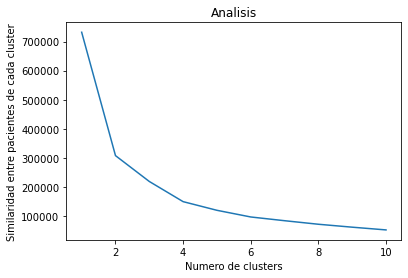

In [124]:
plt.plot(range(1, 11), clusters)
plt.title("Analisis")
plt.xlabel("Numero de clusters")
plt.ylabel("Similaridad entre pacientes de cada cluster")
plt.show()

In [125]:
# analisando la grafica del codo de jambu, podemos 4 clusters seria el numero optimo de clusters
clustering = KMeans(n_clusters = 4, max_iter = 10000)
clustering.fit(pacientes)

KMeans(max_iter=10000, n_clusters=4)

In [131]:
pacientesOriginales['Cluster'] = clustering.labels_
pacientesOriginales.head(20)
predict = [['1','2','0','41','2','2','0','0','1','0','0']]
clustering.predict(predict)

ValueError: X has 11 features, but KMeans is expecting 12 features as input.

In [57]:
pca = PCA(n_components=2)
pca_pacientes = pca.fit_transform(pacientesOriginales)
pca_pacientes_df = pd.DataFrame(data = pca_pacientes, columns = ['A','B'])
pca_nombres = pd.concat([pca_pacientes_df, pacientes[['Cluster']]], axis=1)
pca_nombres    

,A,B,Cluster
0,5.306842,3.494093,NaN
1,32.815456,-7.866833,0.0
2,36.807083,-8.077243,1.0
3,-13.250756,-5.570112,1.0
4,-17.131305,-5.420143,3.0
...,...,...,...
862,33.667808,-9.909936,1.0
863,1.912308,-6.382264,1.0
864,7.839697,-6.640261,0.0
865,4.821961,-8.523263,0.0


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

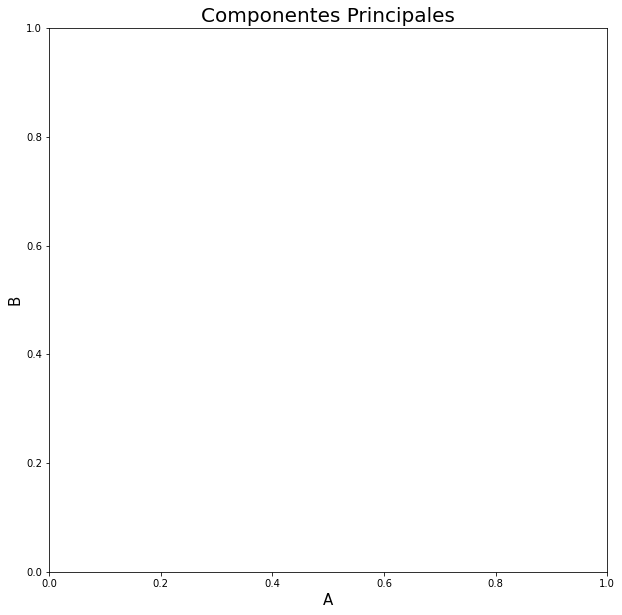

In [58]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('A', fontsize = 15)
ax.set_ylabel('B', fontsize = 15)
ax.set_title('Componentes Principales', fontsize = 20)
color_theme = np.array(['blue','green','red'])
ax.scatter(x = pca_nombres.A, y = pca_nombres.B, c = color_theme[pca_nombres.Cluster], s = 50)
plt.show()

In [28]:
from pathlib import Path

import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import matplotlib.pylab as plt

In [41]:
pacientes = pd.read_csv('dataFinal.csv', sep=';', header=None)
pacientes.columns = ['SEXO','ORIENTACION SEXUAL','IDENTIDAD GENERO','EDAD AÑOS','APORTA','AUTOIDENTIDAD PACIENTE','TIPO DE BONO PACIENTE','GP 1','PREVENCION','MORBILIDAD','CONDICION DE DIAGNOSTICO','CODIGO CIE 10']
pacientes = pacientes.iloc[1:,:]
pacientes.head()


,SEXO,ORIENTACION SEXUAL,IDENTIDAD GENERO,EDAD AÑOS,APORTA,AUTOIDENTIDAD PACIENTE,TIPO DE BONO PACIENTE,GP 1,PREVENCION,MORBILIDAD,CONDICION DE DIAGNOSTICO,CODIGO CIE 10
1,Mujer,Heterosexual,Femenino,41,No aporta,Mestizo/a,Desarrollo Humano,Embarazadas,710 Primera,0,0,Z300 CONSEJO Y ASESORAMIENTO GENERAL SOBRE LA ...
2,Mujer,Heterosexual,Femenino,69,Seguro ISSPOL,Mestizo/a,Ninguno,No aplica,0,710 Primera,226 Definitivo Control,Z501 OTRAS TERAPIAS FISICAS
3,Hombre,Heterosexual,Masculino,73,"IESS, Afiliado seguro Campesino",Mestizo/a,Ninguno,No aplica,0,710 Primera,226 Definitivo Control,Z501 OTRAS TERAPIAS FISICAS
4,Mujer,Heterosexual,Femenino,23,No aporta,Mestizo/a,Ninguno,Planificacion Familiar,711 Subsecuente,0,0,Z501 OTRAS TERAPIAS FISICAS
5,Hombre,Heterosexual,Masculino,19,No aporta,Mestizo/a,Ninguno,No aplica,0,710 Primera,226 Definitivo Control,Z501 OTRAS TERAPIAS FISICAS


In [42]:
# poner todos en minusculas
for x in range(len(pacientes.columns)):    
    for i in range(len(pacientes.iloc[:,0])):
        pacientes.iloc[i,x] = pacientes.iloc[i,x].lower() 
#mostrar valores unicos
for i in pacientes.columns:
    print(f'Columna {i}: {pacientes[i].unique()}')
pacientesOriginales = pacientes

Columna SEXO: ['mujer' 'hombre']
Columna ORIENTACION SEXUAL: ['heterosexual' 'no aplica' 'lesbiana' 'gay' 'no sabe/no responde'
 'bisexual']
Columna IDENTIDAD GENERO: ['femenino' 'masculino' 'no aplica' 'no sabe/no responde']
Columna EDAD AÑOS: ['41' '69' '73' '23' '19' '31' '34' '2' '14' '38' '10' '7' '32' '16' '47'
 '11' '0' '5' '22' '76' '72' '40' '17' '35' '4' '1' '63' '91' '56' '27'
 '70' '8' '46' '25' '52' '6' '29' '15' '12' '21' '24' '55' '37' '54' '39'
 '65' '61' '3' '78' '48' '20' '50' '42' '83' '85' '9' '45' '36' '33' '28'
 '26' '13' '30' '18' '64' '58' '75' '49' '77' '79' '90' '80' '84' '44'
 '87' '59' '92' '60' '53' '51' '43' '66' '67' '86' '74' '62' '68' '93'
 '81' '71' '57']
Columna APORTA: ['no aporta' 'seguro isspol' 'iess, afiliado seguro campesino'
 'iess, afiliado seguro general' 'seguro indirecto']
Columna AUTOIDENTIDAD PACIENTE: ['mestizo/a' 'indígena' 'no aplica' 'blanco/a' 'no sabe/no responde'
 'montubio/a']
Columna TIPO DE BONO PACIENTE: ['desarrollo humano' 'n

(519, 12) (347, 12)


KeyError: "None of [Index(['SEXO', 'ORIENTACION SEXUAL', 'IDENTIDAD GENERO', 'EDAD AÑOS', 'APORTA',\n       'AUTOIDENTIDAD PACIENTE', 'TIPO DE BONO PACIENTE', 'GP 1', 'PREVENCION',\n       'MORBILIDAD', 'CONDICION DE DIAGNOSTICO'],\n      dtype='object')] are in the [columns]"